<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/ML_Examples/Load_CIFAR10_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load CIFAR-10 Image Data with PyTorch

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import torch
import torchvision

from functools import partial
from matplotlib import pyplot as plt
from random import randrange

from tabulate import tabulate
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import random_split
from torch.utils.data.sampler import SubsetRandomSampler
from torchsummary import summary

The CIFAR10 dataset is available in the Torchvision.datasets module and we can download it

In [2]:
# standard cast into Tensor and pixel values normalization in [-1, 1] range
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# extra transfrom for the training data, in order to achieve better performance
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    torchvision.transforms.RandomCrop(32, padding=4, padding_mode='reflect'), 
    torchvision.transforms.RandomHorizontalFlip(), 
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=train_transform
)
validationset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Data analysis

The CIFAR10 dataset is composed of 60000 32x32 color images (RGB), divided into 10 classes. 50000 images for the training set and 10000 for the test set.

In [3]:
print('Training set')
print(f'Samples: {trainset.data.shape}')
print(f'Labels: {len(trainset.targets)}')

print('\nTest set')
print(f'Samples: {testset.data.shape}')
print(f'Labels: {len(testset.targets)}')

print('\nClasses\n')
print(tabulate(
    list(trainset.class_to_idx.items()), headers=['Name', 'Index'], 
    tablefmt='orgtbl'
))

Training set
Samples: (50000, 32, 32, 3)
Labels: 50000

Test set
Samples: (10000, 32, 32, 3)
Labels: 10000

Classes

| Name       |   Index |
|------------+---------|
| airplane   |       0 |
| automobile |       1 |
| bird       |       2 |
| cat        |       3 |
| deer       |       4 |
| dog        |       5 |
| frog       |       6 |
| horse      |       7 |
| ship       |       8 |
| truck      |       9 |


Display some image examples.

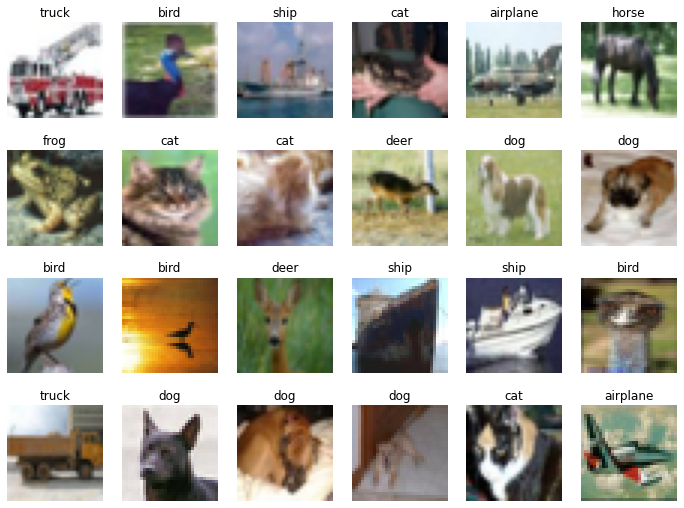

In [4]:
IDX_TO_LABEL = {v: k for k, v in trainset.class_to_idx.items()}

cols = 6
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 9))

for x in range(rows):
    for y in range(cols):
        rnd_idx = randrange(len(trainset.data))
        
        axs[x, y].set_title(IDX_TO_LABEL[trainset.targets[rnd_idx]])
        axs[x, y].imshow(trainset.data[rnd_idx])
        axs[x, y].set_axis_off()

plt.show()    